<a href="https://colab.research.google.com/github/rassylya/epilepcy_recognition/blob/main/EpilepticSeizureRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import model_selection, datasets
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_20newsgroups

from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Embedding, Conv1D, MaxPool1D, Dropout, SimpleRNN, LSTM, Softmax
from keras.layers import Flatten
from tensorflow.keras.optimizers import Adam

import string
import re

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/aikesha/Epilectic_Seizure_Dataset/main/Epileptic%20Seizure%20Recognition.csv')

In [ ]:
df.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


##Binary Classification

In [ ]:
for i in range(df['y'].shape[0]):
    if df['y'][i]!=1:
        df['y'][i]=0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [ ]:
y = df['y']

In [ ]:
df = df.drop(['Unnamed','y'], axis=1)

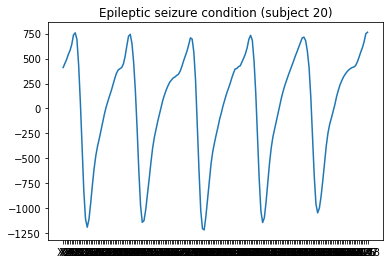

In [ ]:
plt.plot(df.iloc[20])
plt.title('Epileptic seizure condition (subject 20)')
#plt.legend(['Epileptic seizure condition (subject 20)'], loc='lower right')
plt.show()

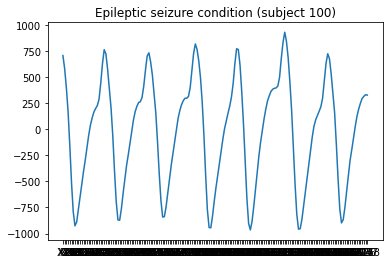

In [ ]:
plt.plot(df.iloc[100])
plt.title('Epileptic seizure condition (subject 100)')
#plt.legend(['Epileptic seizure condition (subject 100)'], loc='lower right')
plt.show()

In [ ]:
df.shape

(11500, 178)

In [ ]:
X = []

for i, row in df.iterrows():
    tmp_x = []
    for elem in row.tolist():
         tmp_x.append([elem])
    X.append(tmp_x)

In [ ]:
X=np.array(X)

In [ ]:
X.shape

(11500, 178, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

## CNN

In [ ]:
model = Sequential()

model.add(Conv1D(64, 3, activation='relu', input_shape=(178,1), padding = 'same'))
model.add(MaxPool1D(pool_size=2, strides=2))
#model.add(Dropout(0.2)) # had some overfitting

model.add(Conv1D(128, 3, activation='relu', input_shape=(178,1), padding = 'same'))
model.add(Conv1D(512, 3, activation='relu', input_shape=(178,1), padding = 'same'))
model.add(Conv1D(1024, 3, activation='relu', input_shape=(178,1), padding = 'same'))
#model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
#model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
#model.add(Softmax())
model.add(Dense(1, activation='sigmoid'))
opt = Adam(learning_rate=0.001)
model.compile(loss = "binary_crossentropy", optimizer = opt ,metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_28 (Conv1D)          (None, 178, 64)           256       
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 89, 64)           0         
 1D)                                                             
                                                                 
 conv1d_29 (Conv1D)          (None, 89, 128)           24704     
                                                                 
 conv1d_30 (Conv1D)          (None, 89, 512)           197120    
                                                                 
 conv1d_31 (Conv1D)          (None, 89, 1024)          1573888   
                                                                 
 dropout_9 (Dropout)         (None, 89, 1024)          0         
                                                     

In [ ]:
historyCNN = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, batch_size=128, verbose=2)

Epoch 1/100
81/81 - 10s - loss: 0.6245 - accuracy: 0.7692 - val_loss: 0.2458 - val_accuracy: 0.9256 - 10s/epoch - 119ms/step
Epoch 2/100
81/81 - 8s - loss: 0.1923 - accuracy: 0.9334 - val_loss: 0.1867 - val_accuracy: 0.9352 - 8s/epoch - 103ms/step
Epoch 3/100
81/81 - 8s - loss: 0.1695 - accuracy: 0.9420 - val_loss: 0.1931 - val_accuracy: 0.9323 - 8s/epoch - 101ms/step
Epoch 4/100
81/81 - 9s - loss: 0.1620 - accuracy: 0.9443 - val_loss: 0.1742 - val_accuracy: 0.9391 - 9s/epoch - 105ms/step
Epoch 5/100
81/81 - 8s - loss: 0.1592 - accuracy: 0.9450 - val_loss: 0.1825 - val_accuracy: 0.9362 - 8s/epoch - 98ms/step
Epoch 6/100
81/81 - 8s - loss: 0.1574 - accuracy: 0.9459 - val_loss: 0.1772 - val_accuracy: 0.9379 - 8s/epoch - 99ms/step
Epoch 7/100
81/81 - 8s - loss: 0.1550 - accuracy: 0.9463 - val_loss: 0.1788 - val_accuracy: 0.9369 - 8s/epoch - 95ms/step
Epoch 8/100
81/81 - 8s - loss: 0.1520 - accuracy: 0.9470 - val_loss: 0.1786 - val_accuracy: 0.9355 - 8s/epoch - 95ms/step
Epoch 9/100
81/81 

In [ ]:
loss_SigCNN, acc_SigCNN = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc_SigCNN)

Test Accuracy: 0.939


### Visualization

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


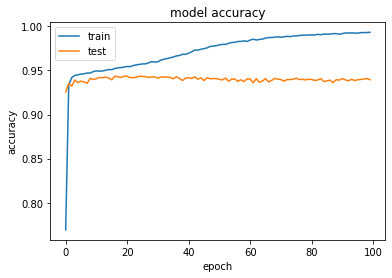

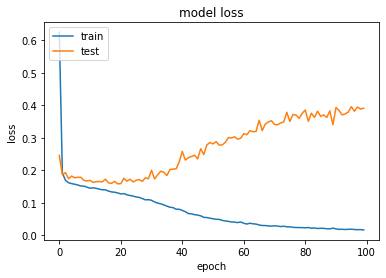

In [ ]:
# list all data in history
print(historyCNN.history.keys())
# summarize history for accuracy
plt.plot(historyCNN.history['accuracy'])
plt.plot(historyCNN.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(historyCNN.history['loss'])
plt.plot(historyCNN.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

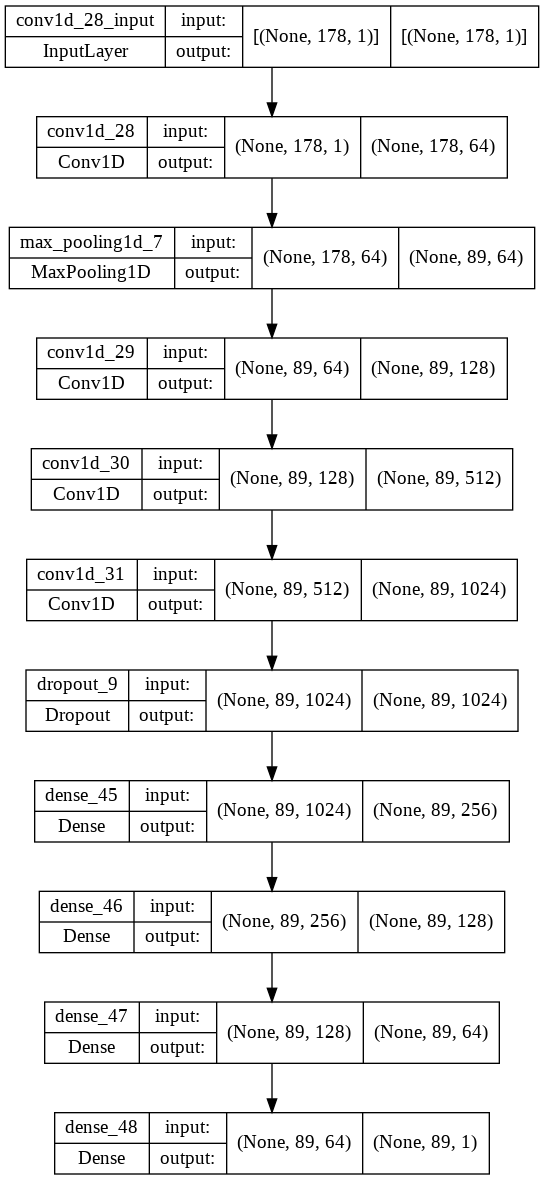

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### Save model

In [ ]:
!pip install h5py

In [ ]:
model.save('model.h5')

## CNN (with additionalal Dropout layers)

In [ ]:
model = Sequential()

model.add(Conv1D(64, 3, activation='relu', input_shape=(178,1), padding = 'same'))
model.add(MaxPool1D(pool_size=2, strides=2))
model.add(Dropout(0.2))

model.add(Conv1D(128, 3, activation='relu', input_shape=(178,1), padding = 'same'))
model.add(Conv1D(512, 3, activation='relu', input_shape=(178,1), padding = 'same'))
model.add(Conv1D(1024, 3, activation='relu', input_shape=(178,1), padding = 'same'))
model.add(Dropout(0.2))

model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))
opt = Adam(learning_rate=0.001)
model.compile(loss = "binary_crossentropy", optimizer = opt ,metrics=['accuracy'])

In [ ]:
historyCNNwithDL = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, batch_size=128, verbose=2)

Epoch 1/100
81/81 - 21s - loss: 0.6454 - accuracy: 0.7735 - val_loss: 0.2884 - val_accuracy: 0.8967 - 21s/epoch - 261ms/step
Epoch 2/100
81/81 - 7s - loss: 0.2090 - accuracy: 0.9316 - val_loss: 0.2112 - val_accuracy: 0.9269 - 7s/epoch - 92ms/step
Epoch 3/100
81/81 - 7s - loss: 0.1909 - accuracy: 0.9376 - val_loss: 0.1970 - val_accuracy: 0.9325 - 7s/epoch - 92ms/step
Epoch 4/100
81/81 - 7s - loss: 0.1880 - accuracy: 0.9379 - val_loss: 0.1991 - val_accuracy: 0.9339 - 7s/epoch - 92ms/step
Epoch 5/100
81/81 - 8s - loss: 0.1860 - accuracy: 0.9382 - val_loss: 0.1881 - val_accuracy: 0.9340 - 8s/epoch - 93ms/step
Epoch 6/100
81/81 - 8s - loss: 0.1780 - accuracy: 0.9411 - val_loss: 0.2109 - val_accuracy: 0.9267 - 8s/epoch - 93ms/step
Epoch 7/100
81/81 - 8s - loss: 0.1778 - accuracy: 0.9404 - val_loss: 0.1792 - val_accuracy: 0.9378 - 8s/epoch - 93ms/step
Epoch 8/100
81/81 - 8s - loss: 0.1714 - accuracy: 0.9429 - val_loss: 0.1745 - val_accuracy: 0.9390 - 8s/epoch - 97ms/step
Epoch 9/100
81/81 - 8

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 178, 64)           256       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 89, 64)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 89, 64)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 89, 128)           24704     
                                                                 
 conv1d_2 (Conv1D)           (None, 89, 512)           197120    
                                                                 
 conv1d_3 (Conv1D)           (None, 89, 1024)          1573888   
                                                        

In [ ]:
loss_SigCNNwithDL, acc_SigCNNwithDL = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc_SigCNNwithDL)

Test Accuracy: 0.941


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


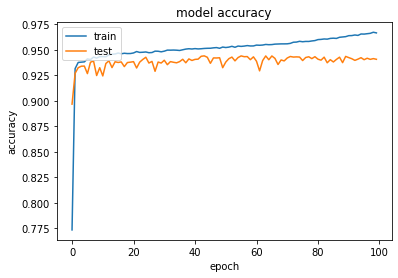

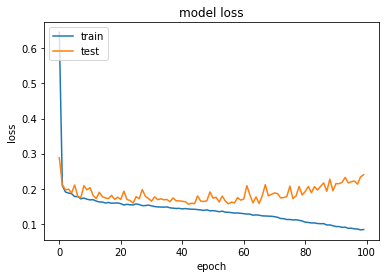

In [ ]:
# list all data in history
print(historyCNNwithDL.history.keys())
# summarize history for accuracy
plt.plot(historyCNNwithDL.history['accuracy'])
plt.plot(historyCNNwithDL.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(historyCNNwithDL.history['loss'])
plt.plot(historyCNNwithDL.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## LSTM

In [ ]:
model = Sequential()
model.add(LSTM(64, input_shape=(178,1), return_sequences=True))
model.add(LSTM(64))
model.add(Dropout(0.2))
#model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
#model.add(Softmax())
model.add(Dense(1, activation='sigmoid'))
opt = Adam(learning_rate=0.001)
model.compile(loss = "binary_crossentropy", optimizer = opt ,metrics=['accuracy'])
#model.add(Flatten())
#model.add(Softmax())

#model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 178, 64)           16896     
                                                                 
 lstm_9 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_49 (Dense)            (None, 256)               16640     
                                                                 
 dense_50 (Dense)            (None, 128)               32896     
                                                                 
 dense_51 (Dense)            (None, 64)                8256      
                                                                 
 dense_52 (Dense)            (None, 1)               

In [ ]:
historyLSTM = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, batch_size=128, verbose=2)

Epoch 1/100
81/81 - 14s - loss: 0.2465 - accuracy: 0.9114 - val_loss: 0.2119 - val_accuracy: 0.9339 - 14s/epoch - 174ms/step
Epoch 2/100
81/81 - 6s - loss: 0.1630 - accuracy: 0.9522 - val_loss: 0.1473 - val_accuracy: 0.9452 - 6s/epoch - 80ms/step
Epoch 3/100
81/81 - 6s - loss: 0.1707 - accuracy: 0.9344 - val_loss: 0.1519 - val_accuracy: 0.9391 - 6s/epoch - 79ms/step
Epoch 4/100
81/81 - 6s - loss: 0.1228 - accuracy: 0.9549 - val_loss: 0.1687 - val_accuracy: 0.9278 - 6s/epoch - 79ms/step
Epoch 5/100
81/81 - 6s - loss: 0.1131 - accuracy: 0.9570 - val_loss: 0.1228 - val_accuracy: 0.9635 - 6s/epoch - 79ms/step
Epoch 6/100
81/81 - 6s - loss: 0.1100 - accuracy: 0.9619 - val_loss: 0.1030 - val_accuracy: 0.9643 - 6s/epoch - 78ms/step
Epoch 7/100
81/81 - 6s - loss: 0.0899 - accuracy: 0.9691 - val_loss: 0.1156 - val_accuracy: 0.9557 - 6s/epoch - 79ms/step
Epoch 8/100
81/81 - 6s - loss: 0.0890 - accuracy: 0.9686 - val_loss: 0.1052 - val_accuracy: 0.9730 - 6s/epoch - 80ms/step
Epoch 9/100
81/81 - 6

In [ ]:
loss_SigLSTM, acc_SigLSTM = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc_SigLSTM)

Test Accuracy: 0.986


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


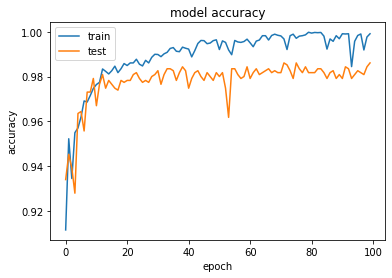

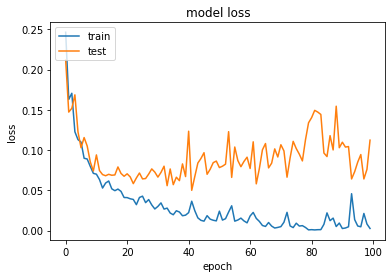

In [ ]:
# list all data in history
print(historyLSTM.history.keys())
# summarize history for accuracy
plt.plot(historyLSTM.history['accuracy'])
plt.plot(historyLSTM.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(historyLSTM.history['loss'])
plt.plot(historyLSTM.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plot_model(model, to_file='model_plot2.png', show_shapes=True, show_layer_names=True)

NameError: ignored

## Conv1D + LSTM

In [ ]:
model = Sequential()

model.add(Conv1D(64, 3, activation='relu', input_shape=(178,1), padding = 'same'))
model.add(MaxPool1D(pool_size=2, strides=2))
model.add(Conv1D(128, 3, activation='relu', padding = 'same'))
model.add(Conv1D(512, 3, activation='relu', padding = 'same'))
model.add(Conv1D(1024, 3, activation='relu', padding = 'same'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
#model.add(Flatten())
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))

model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64,activation='relu'))
#model.add(Softmax())
model.add(Dense(1, activation='sigmoid'))
#opt = SGD(learning_rate=0.001)
opt = Adam(learning_rate=0.001)
model.compile(loss = "binary_crossentropy", optimizer = opt ,metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 178, 64)           256       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 89, 64)           0         
 1D)                                                             
                                                                 
 conv1d_9 (Conv1D)           (None, 89, 128)           24704     
                                                                 
 conv1d_10 (Conv1D)          (None, 89, 512)           197120    
                                                                 
 conv1d_11 (Conv1D)          (None, 89, 1024)          1573888   
                                                                 
 dense_9 (Dense)             (None, 89, 256)           262400    
                                                      

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, batch_size=128, verbose=2)

Epoch 1/100
81/81 - 16s - loss: 0.2423 - accuracy: 0.8937 - val_loss: 0.1606 - val_accuracy: 0.9252 - 16s/epoch - 193ms/step
Epoch 2/100
81/81 - 9s - loss: 0.0937 - accuracy: 0.9651 - val_loss: 0.0923 - val_accuracy: 0.9713 - 9s/epoch - 112ms/step
Epoch 3/100
81/81 - 9s - loss: 0.0785 - accuracy: 0.9715 - val_loss: 0.1730 - val_accuracy: 0.9435 - 9s/epoch - 112ms/step
Epoch 4/100
81/81 - 9s - loss: 0.0820 - accuracy: 0.9683 - val_loss: 0.0655 - val_accuracy: 0.9800 - 9s/epoch - 112ms/step
Epoch 5/100
81/81 - 9s - loss: 0.0574 - accuracy: 0.9809 - val_loss: 0.0697 - val_accuracy: 0.9765 - 9s/epoch - 113ms/step
Epoch 6/100
81/81 - 9s - loss: 0.0451 - accuracy: 0.9837 - val_loss: 0.0546 - val_accuracy: 0.9817 - 9s/epoch - 114ms/step
Epoch 7/100
81/81 - 9s - loss: 0.0388 - accuracy: 0.9872 - val_loss: 0.0505 - val_accuracy: 0.9852 - 9s/epoch - 113ms/step
Epoch 8/100
81/81 - 9s - loss: 0.0341 - accuracy: 0.9882 - val_loss: 0.0765 - val_accuracy: 0.9757 - 9s/epoch - 117ms/step
Epoch 9/100
81

In [ ]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.993


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


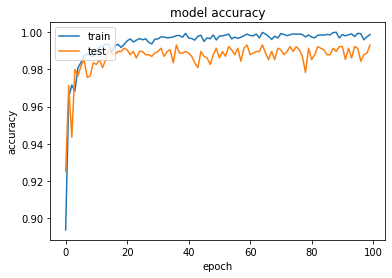

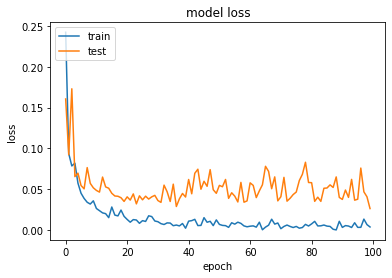

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

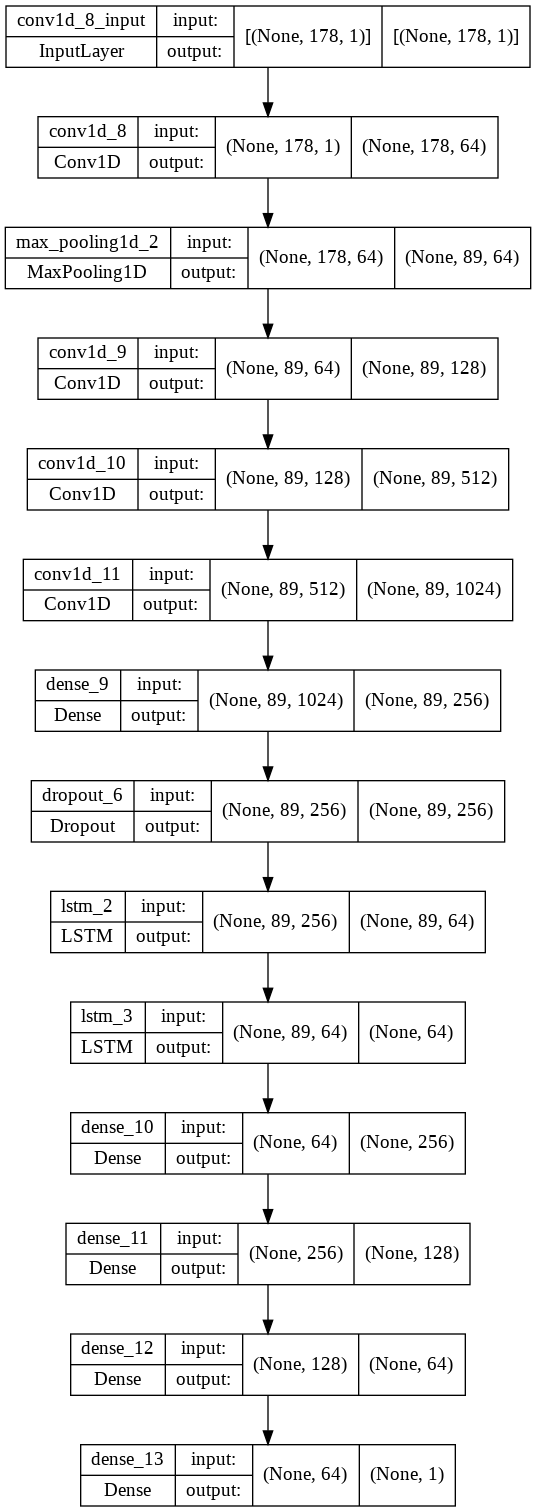

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.save('modelLC.h5')

## Conv1D + LSTM (with additional Dropout layers)

In [ ]:
model = Sequential()

model.add(Conv1D(64, 3, activation='relu', input_shape=(178,1), padding = 'same'))
model.add(MaxPool1D(pool_size=2, strides=2))
model.add(Dropout(0.2))
model.add(Conv1D(128, 3, activation='relu', padding = 'same'))
model.add(Conv1D(512, 3, activation='relu', padding = 'same'))
model.add(Conv1D(1024, 3, activation='relu', padding = 'same'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))

model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))
opt = Adam(learning_rate=0.001)
model.compile(loss = "binary_crossentropy", optimizer = opt ,metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 178, 64)           256       
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 89, 64)           0         
 1D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 89, 64)            0         
                                                                 
 conv1d_13 (Conv1D)          (None, 89, 128)           24704     
                                                                 
 conv1d_14 (Conv1D)          (None, 89, 512)           197120    
                                                                 
 conv1d_15 (Conv1D)          (None, 89, 1024)          1573888   
                                                      

In [ ]:
historyCNNLSTMwithDL = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, batch_size=128, verbose=2)

Epoch 1/100
81/81 - 20s - loss: 0.3390 - accuracy: 0.8592 - val_loss: 0.1728 - val_accuracy: 0.9530 - 20s/epoch - 249ms/step
Epoch 2/100
81/81 - 9s - loss: 0.1527 - accuracy: 0.9460 - val_loss: 0.2391 - val_accuracy: 0.9113 - 9s/epoch - 113ms/step
Epoch 3/100
81/81 - 9s - loss: 0.1363 - accuracy: 0.9506 - val_loss: 0.0978 - val_accuracy: 0.9635 - 9s/epoch - 113ms/step
Epoch 4/100
81/81 - 9s - loss: 0.0917 - accuracy: 0.9660 - val_loss: 0.0813 - val_accuracy: 0.9748 - 9s/epoch - 113ms/step
Epoch 5/100
81/81 - 9s - loss: 0.0800 - accuracy: 0.9710 - val_loss: 0.0945 - val_accuracy: 0.9696 - 9s/epoch - 113ms/step
Epoch 6/100
81/81 - 9s - loss: 0.0614 - accuracy: 0.9785 - val_loss: 0.1035 - val_accuracy: 0.9626 - 9s/epoch - 114ms/step
Epoch 7/100
81/81 - 9s - loss: 0.0648 - accuracy: 0.9745 - val_loss: 0.0613 - val_accuracy: 0.9791 - 9s/epoch - 114ms/step
Epoch 8/100
81/81 - 9s - loss: 0.0442 - accuracy: 0.9839 - val_loss: 0.0456 - val_accuracy: 0.9843 - 9s/epoch - 114ms/step
Epoch 9/100
81

In [ ]:
loss2, acc2 = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc2)

Test Accuracy: 0.992


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


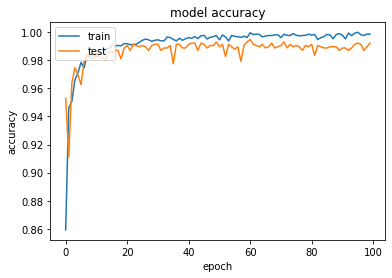

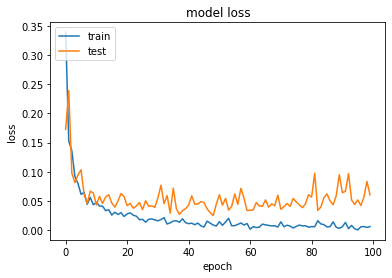

In [ ]:
# list all data in history
print(historyCNNLSTMwithDL.history.keys())
# summarize history for accuracy
plt.plot(historyCNNLSTMwithDL.history['accuracy'])
plt.plot(historyCNNLSTMwithDL.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(historyCNNLSTMwithDL.history['loss'])
plt.plot(historyCNNLSTMwithDL.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## CNN with Softmax

In [ ]:
model = Sequential()

model.add(Conv1D(64, 3, activation='relu', input_shape=(178,1), padding = 'same'))
model.add(MaxPool1D(pool_size=2, strides=2))
#model.add(Dropout(0.2)) # had some overfitting

model.add(Conv1D(128, 3, activation='relu', input_shape=(178,1), padding = 'same'))
model.add(Conv1D(512, 3, activation='relu', input_shape=(178,1), padding = 'same'))
model.add(Conv1D(1024, 3, activation='relu', input_shape=(178,1), padding = 'same'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
#model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64,activation='relu'))
#model.add(Softmax())
model.add(Dense(1,activation='softmax'))
#opt = SGD(learning_rate=0.001)
model.compile(loss = "binary_crossentropy", optimizer = 'adam' ,metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=64, batch_size=64, verbose=2)

Epoch 1/64
126/126 - 10s - loss: 12.1994 - accuracy: 0.2000 - val_loss: 12.1994 - val_accuracy: 0.2000 - 10s/epoch - 77ms/step
Epoch 2/64
126/126 - 8s - loss: 12.1994 - accuracy: 0.2000 - val_loss: 12.1994 - val_accuracy: 0.2000 - 8s/epoch - 60ms/step
Epoch 3/64
126/126 - 8s - loss: 12.1994 - accuracy: 0.2000 - val_loss: 12.1994 - val_accuracy: 0.2000 - 8s/epoch - 61ms/step
Epoch 4/64
126/126 - 8s - loss: 12.1994 - accuracy: 0.2000 - val_loss: 12.1994 - val_accuracy: 0.2000 - 8s/epoch - 61ms/step
Epoch 5/64
126/126 - 8s - loss: 12.1994 - accuracy: 0.2000 - val_loss: 12.1994 - val_accuracy: 0.2000 - 8s/epoch - 61ms/step
Epoch 6/64
126/126 - 8s - loss: 12.1994 - accuracy: 0.2000 - val_loss: 12.1994 - val_accuracy: 0.2000 - 8s/epoch - 61ms/step
Epoch 7/64
126/126 - 8s - loss: 12.1994 - accuracy: 0.2000 - val_loss: 12.1994 - val_accuracy: 0.2000 - 8s/epoch - 60ms/step
Epoch 8/64
126/126 - 8s - loss: 12.1994 - accuracy: 0.2000 - val_loss: 12.1994 - val_accuracy: 0.2000 - 8s/epoch - 61ms/ste

In [ ]:
loss_SoftCNN, acc_SoftCNN = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc_SoftCNN)

Test Accuracy: 0.200


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


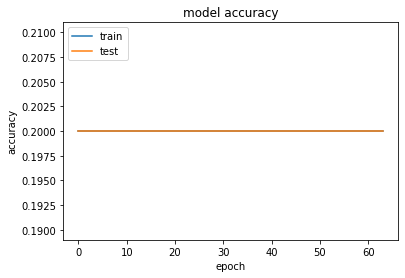

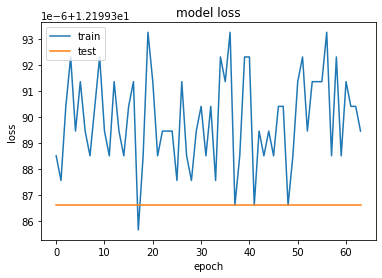

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# DNN

In [ ]:
model = Sequential()
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
#model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
#model.add(Softmax())
model.add(Dense(1, activation='sigmoid'))
opt = Adam(learning_rate=0.001)
model.compile(loss = "binary_crossentropy", optimizer = opt ,metrics=['accuracy'])
#model.add(Flatten())
#model.add(Softmax())

#model.add(Dense(1, activation='sigmoid'))

In [ ]:
historyDNN = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, batch_size=128, verbose=2)

Epoch 1/100
81/81 - 31s - loss: 0.3325 - accuracy: 0.8791 - val_loss: 0.3415 - val_accuracy: 0.8779 - 31s/epoch - 385ms/step
Epoch 2/100
81/81 - 31s - loss: 0.3231 - accuracy: 0.8842 - val_loss: 0.3616 - val_accuracy: 0.8676 - 31s/epoch - 378ms/step
Epoch 3/100
81/81 - 31s - loss: 0.3245 - accuracy: 0.8830 - val_loss: 0.3521 - val_accuracy: 0.8725 - 31s/epoch - 378ms/step
Epoch 4/100
81/81 - 32s - loss: 0.3208 - accuracy: 0.8850 - val_loss: 0.3388 - val_accuracy: 0.8785 - 32s/epoch - 394ms/step
Epoch 5/100
81/81 - 31s - loss: 0.3186 - accuracy: 0.8862 - val_loss: 0.3489 - val_accuracy: 0.8723 - 31s/epoch - 380ms/step
Epoch 6/100
81/81 - 31s - loss: 0.3202 - accuracy: 0.8852 - val_loss: 0.3351 - val_accuracy: 0.8795 - 31s/epoch - 379ms/step
Epoch 7/100
81/81 - 31s - loss: 0.3193 - accuracy: 0.8854 - val_loss: 0.3520 - val_accuracy: 0.8745 - 31s/epoch - 380ms/step
Epoch 8/100
81/81 - 31s - loss: 0.3183 - accuracy: 0.8864 - val_loss: 0.3495 - val_accuracy: 0.8728 - 31s/epoch - 379ms/step


In [ ]:
loss_DNN, acc_DNN = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc_DNN)

Test Accuracy: 0.876


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


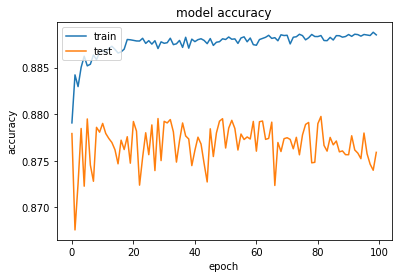

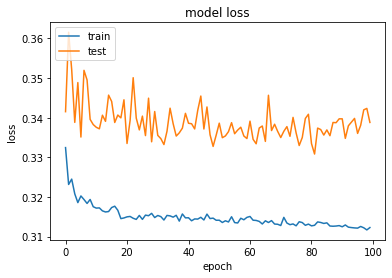

In [ ]:
# list all data in history
print(historyDNN.history.keys())
# summarize history for accuracy
plt.plot(historyDNN.history['accuracy'])
plt.plot(historyDNN.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(historyDNN.history['loss'])
plt.plot(historyDNN.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 178, 256)          512       
                                                                 
 dropout_1 (Dropout)         (None, 178, 256)          0         
                                                                 
 dense_6 (Dense)             (None, 178, 256)          65792     
                                                                 
 dense_7 (Dense)             (None, 178, 128)          32896     
                                                                 
 dense_8 (Dense)             (None, 178, 64)           8256      
                                                                 
 dense_9 (Dense)             (None, 178, 1)            65        
                                                                 
Total params: 107,521
Trainable params: 107,521
Non-tr

## DNN (with additionalal Dropout layers)

In [ ]:
model = Sequential()
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))
opt = Adam(learning_rate=0.001)
model.compile(loss = "binary_crossentropy", optimizer = opt, metrics=['accuracy'])

In [ ]:
historyDNNwithDL = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, batch_size=128, verbose=2)

Epoch 1/100
81/81 - 4s - loss: 0.8769 - accuracy: 0.6596 - val_loss: 0.6646 - val_accuracy: 0.8526 - 4s/epoch - 46ms/step
Epoch 2/100
81/81 - 2s - loss: 0.6431 - accuracy: 0.8022 - val_loss: 0.5502 - val_accuracy: 0.8555 - 2s/epoch - 24ms/step
Epoch 3/100
81/81 - 2s - loss: 0.4878 - accuracy: 0.8269 - val_loss: 0.4093 - val_accuracy: 0.8326 - 2s/epoch - 25ms/step
Epoch 4/100
81/81 - 2s - loss: 0.3686 - accuracy: 0.8649 - val_loss: 0.3559 - val_accuracy: 0.8727 - 2s/epoch - 24ms/step
Epoch 5/100
81/81 - 2s - loss: 0.3447 - accuracy: 0.8782 - val_loss: 0.3713 - val_accuracy: 0.8659 - 2s/epoch - 24ms/step
Epoch 6/100
81/81 - 2s - loss: 0.3390 - accuracy: 0.8802 - val_loss: 0.3938 - val_accuracy: 0.8598 - 2s/epoch - 24ms/step
Epoch 7/100
81/81 - 2s - loss: 0.3362 - accuracy: 0.8814 - val_loss: 0.3506 - val_accuracy: 0.8748 - 2s/epoch - 24ms/step
Epoch 8/100
81/81 - 2s - loss: 0.3305 - accuracy: 0.8847 - val_loss: 0.3538 - val_accuracy: 0.8744 - 2s/epoch - 25ms/step
Epoch 9/100
81/81 - 2s -

In [ ]:
loss_DNNwithDL, acc_DNNwithDL = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc_DNNwithDL)

Test Accuracy: 0.847


In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 178, 256)          512       
                                                                 
 dropout_14 (Dropout)        (None, 178, 256)          0         
                                                                 
 dense_30 (Dense)            (None, 178, 256)          65792     
                                                                 
 dense_31 (Dense)            (None, 178, 128)          32896     
                                                                 
 dense_32 (Dense)            (None, 178, 64)           8256      
                                                                 
 dropout_15 (Dropout)        (None, 178, 64)           0         
                                                                 
 dense_33 (Dense)            (None, 178, 1)           

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


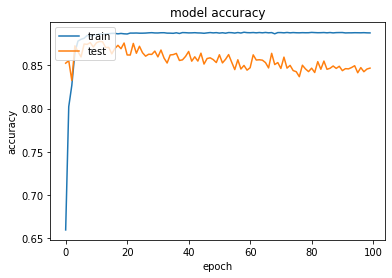

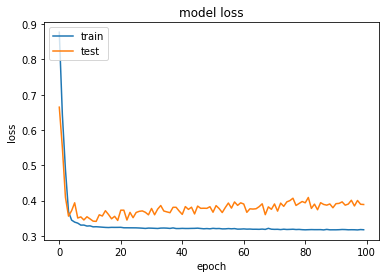

In [ ]:
# list all data in history
print(historyDNNwithDL.history.keys())
# summarize history for accuracy
plt.plot(historyDNNwithDL.history['accuracy'])
plt.plot(historyDNNwithDL.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(historyDNNwithDL.history['loss'])
plt.plot(historyDNNwithDL.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# CNN +LSTM (Softmax)

In [ ]:
model = Sequential()

model.add(Conv1D(64, 3, activation='relu', input_shape=(178,1), padding = 'same'))
model.add(MaxPool1D(pool_size=2, strides=2))
model.add(Conv1D(128, 3, activation='relu', padding = 'same'))
model.add(Conv1D(512, 3, activation='relu', padding = 'same'))
model.add(Conv1D(1024, 3, activation='relu', padding = 'same'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
#model.add(Flatten())
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))

model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64,activation='relu'))
#model.add(Softmax())
model.add(Dense(1, activation='softmax'))
#opt = SGD(learning_rate=0.001)
opt = Adam(learning_rate=0.001)
model.compile(loss = "binary_crossentropy", optimizer = opt ,metrics=['accuracy'])

In [ ]:
historyAllSoft = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, batch_size=64, verbose=2)

Epoch 1/100
162/162 - 29s - loss: 0.1995 - accuracy: 0.1989 - val_loss: 0.1277 - val_accuracy: 0.2096 - 29s/epoch - 179ms/step
Epoch 2/100
162/162 - 12s - loss: 0.1032 - accuracy: 0.1989 - val_loss: 0.0726 - val_accuracy: 0.2096 - 12s/epoch - 76ms/step
Epoch 3/100
162/162 - 12s - loss: 0.0657 - accuracy: 0.1989 - val_loss: 0.0728 - val_accuracy: 0.2096 - 12s/epoch - 75ms/step
Epoch 4/100
162/162 - 12s - loss: 0.0479 - accuracy: 0.1989 - val_loss: 0.0711 - val_accuracy: 0.2096 - 12s/epoch - 75ms/step
Epoch 5/100
162/162 - 12s - loss: 0.0481 - accuracy: 0.1989 - val_loss: 0.0617 - val_accuracy: 0.2096 - 12s/epoch - 76ms/step
Epoch 6/100
162/162 - 12s - loss: 0.0466 - accuracy: 0.1989 - val_loss: 0.0551 - val_accuracy: 0.2096 - 12s/epoch - 75ms/step
Epoch 7/100
162/162 - 12s - loss: 0.0383 - accuracy: 0.1989 - val_loss: 0.0490 - val_accuracy: 0.2096 - 12s/epoch - 76ms/step
Epoch 8/100
162/162 - 12s - loss: 0.0421 - accuracy: 0.1989 - val_loss: 0.0393 - val_accuracy: 0.2096 - 12s/epoch - 7

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 178, 64)           256       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 89, 64)           0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 89, 128)           24704     
                                                                 
 conv1d_6 (Conv1D)           (None, 89, 512)           197120    
                                                                 
 conv1d_7 (Conv1D)           (None, 89, 1024)          1573888   
                                                                 
 dense_5 (Dense)             (None, 89, 256)           262400    
                                                      

In [ ]:
loss_ALL, acc_ALL = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc_ALL)

Test Accuracy: 0.210


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


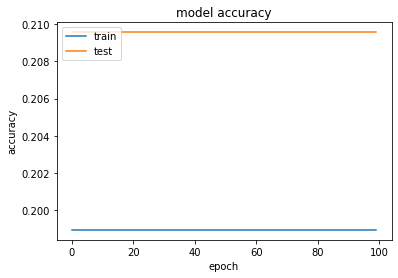

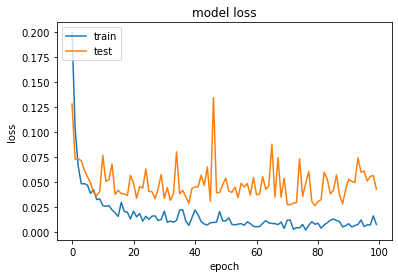

In [ ]:
# list all data in history
print(historyAllSoft.history.keys())
# summarize history for accuracy
plt.plot(historyAllSoft.history['accuracy'])
plt.plot(historyAllSoft.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(historyAllSoft.history['loss'])
plt.plot(historyAllSoft.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()